In [33]:
#This notebook contains my implementation of linear regression in all 3 formats: Pure batch, pure stochastic and stochastic + batch.
#I have already implemented Linear Regression in the 1st week. But I am practising all the algorithms from scratch again, hence the implementation.
#This notebook aims to differentiate between the 2 methodologies and how to leverage the best of both.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
#Importing all the basic libraries.
#This time, we will be using a synthetic dataset for our demonstration.

In [35]:
np.random.seed(68)
#Generated a seed for randomising values. This seed will ensure that the randomised values generated each time are same.
#"Randomising" the "same values" each time means that it will generate the values to be used, randomly, and only once.
#These values will then be recycled as we run the code again and again if needed.
X = np.random.randn(2000, 30)
#We will be generating an X with 2000 samples and 30 different features, on which are true Y shall depend.
#The above command generates the dataset matrix X to be used, with the probability of each entry being given by a Normal Distribution (A random design choice).
Q_true = np.random.uniform(low = -100, high = 100, size = (31, 1))
#This will be our true theta vector that the model aims to reach.
#The values of each theta feature here are distributed uniformly over [-100, 100]. This is also a random design choice.
#The column vector is of size (31, 1) instead of (30, 1), due to inclusion of a constant term independent of X.
print(X.shape)
print(Q_true.shape)
#Verifying the shapes.

(2000, 30)
(31, 1)


In [36]:
X = np.hstack([np.ones((X.shape[0], 1)), X])
#To make X compatible with Q_true, we need a column of 1's right at the start of the matrix, accounting for the constant term.
Y = X @ Q_true + np.random.randn(X.shape[0], 1)
#Here X @ Q_true is the predictable part of Y. The third term is introduced as the errors, or the noise.
#The noise being distributed by a normal curve is NOT a design choice here, and is in fact crucial to the Regression problem.
#We assume the noises per sample to be distributed normally and indentical to each other, along with being independent of each other.

# Implementation of Pure Batch:

In [37]:
Q_batch = np.zeros((31, 1))
#Initialised our theta vector at the origin. All entries are 0 right now.
def grad_b(X, Y, Q):
    H = X @ Q
    return X.T @ (H - Y) / X.shape[0]
#This is the gradient of our cost function J(Q), a scalar, wrt Q (where Q is theta). It will be used in our updation algorithm.
#The cost function is essentially just the mean of all squared errors, each error being approximately normally distributed.
#Since each error is normally distributed, the mean of their squares will be Chi-squared distributed. Nothing that important for our algorithm, but just plain interesting.

In [38]:
i = 0
alpha = 0.001
iters = 4000
cost_function_batch = []
#Approximately set arbitrary values for no. of iterations and alpha. i is the iterator through our updation algorithm.
#cost_function is an array to fetch values for the cost function. Plotting J(Q) vs no. of iterations gives us an idea about convergence of the algorithm.
while(i < iters):
    errors = X @ Q_batch - Y
    #Calculating the error between Hypothesis (H = X @ Q) entries and Y entries, and storing in matrix.
    cost = np.mean(errors**2)
    #Squaring and fetching mean of those errors gives us the cost function J(Q).
    cost_function_batch.append(cost)
    #Appending the cost.
    Q_batch -= alpha*grad_b(X, Y, Q_batch)
    #Basic updation algorithm for convergence of Q_batch.
    i += 1

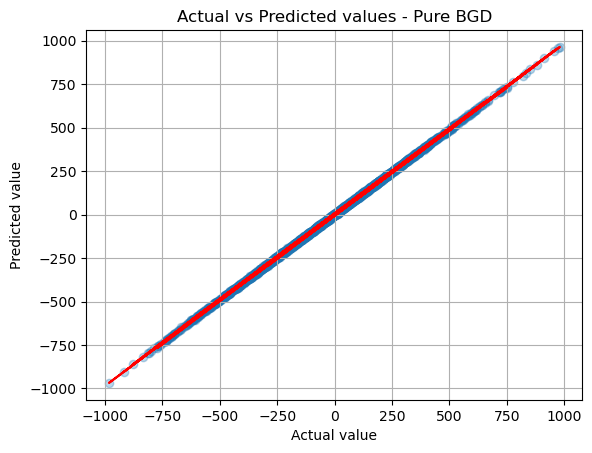

In [39]:
plt.scatter(Y, X @ Q_batch, alpha = 0.3)
plt.plot(Y, X @ Q_batch, color = 'red')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted values - Pure BGD")
plt.grid(True)
plt.show()

## Notes:
1. As seen, the estimated line cleanly converges with the line X = Y. This shows that the predicted values are very close to actual values.
2. The red line denotes the linear estimated plot between predicted and actual values.
3. The blue scatterplot represents the predicted values for actual values. It is this scatterplot around which our line is centered.

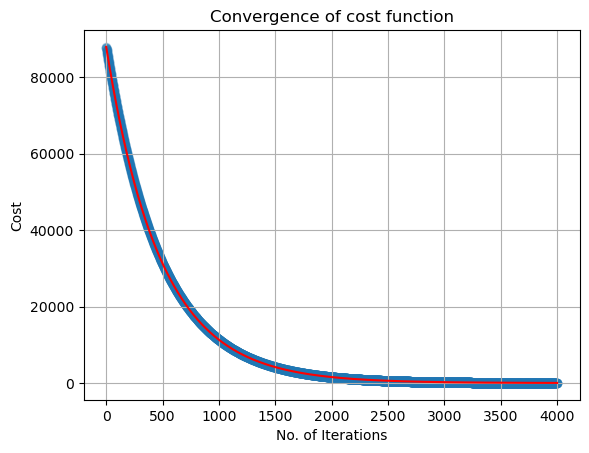

In [40]:
plt.scatter(range(len(cost_function_batch)), cost_function_batch, alpha = 0.3)
plt.plot(range(len(cost_function_batch)), cost_function_batch, color = 'red')
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of cost function")
plt.grid(True)
plt.show()

## Notes:
1. As seen clearly, the cost function cleanly converges to an accurate minimum.
2. Plotting this over allows us to get a good estimate of how the hyperparameters are behaving, and if any adjustment is needed.
3. The basic updation algorithm is given by: $$\theta^{t + 1} = \theta^{t} - \alpha \nabla_{\theta} J(\theta)$$
4. The gradient descent rule works for all convex functions. The MSE (Mean Squared Error) in this case is a convex function in $\theta$.

# Implementation of pure stochastic:

In [41]:
Q_stoc = np.zeros((31, 1))
#Initialised theta vector at origin.
def grad_s(X_i, Y_i, Q):
    H_i = X_i @ Q
    return X_i.T * (H_i - Y_i)
#The '_i' notation denotes the fact that we will NOT be computing the mean of gradients of costs due to all samples.
#Rather, this is the gradient per sample, which will be used to make stochastic updates.
#Since the gradient doesn't take into account all samples per update, we expect the updates to be noisy.
#Here, X_i denotes ith input vector (31, 1) shape. Y_i is the ith target and H_i is the ith predicted value, both scalars.

In [42]:
i = 0
beta = 0.001
epochs = 2
#1 epoch = 1 full iteration through all the samples.
#Here, 1 epoch = 2000 samples. Thus, 2 epochs = 4000 total iterations.
cost_function_stoc = []
#Storing our cost.
while(i < epochs):
    j = 0
    #We will be using nested loops to go about the iterations.
    perm_index = np.random.permutation(X.shape[0])
    X = X[perm_index]
    Y = Y[perm_index]
    #Shuffled the X and Y matrices. This is important to ensure minimum variance over the cost function iteration.
    #The ordered pair of (X_i, Y_i) is still intact.
    while(j < X.shape[0]):
        errors = X @ Q_stoc - Y
        cost = np.mean(errors**2)
        cost_function_stoc.append(cost)
        #Recorded the cost.
        X_j = X[[j], :]
        Y_j = Y[j, 0]
        #Fetching all the required values.
        Q_stoc -= beta*grad_s(X_j, Y_j, Q_stoc)
        #Basic updation rule for stochastic.
        j += 1
    i += 1

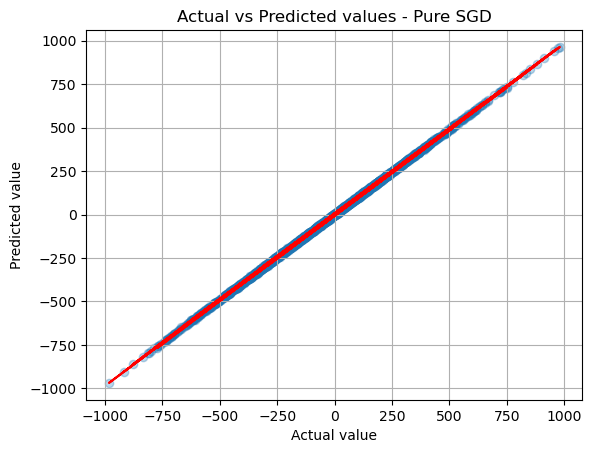

In [43]:
plt.scatter(Y, X @ Q_stoc, alpha = 0.3)
plt.plot(Y, X @ Q_stoc, color = 'red')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted values - Pure SGD")
plt.grid(True)
plt.show()

## Notes:
1. As seen, the estimated line cleanly converges with the line X = Y. This shows that the predicted values are very close to actual values.
2. The red line denotes the linear estimated plot between predicted and actual values.
3. The blue scatterplot represents the predicted values for actual values. It is this scatterplot around which our line is centered.
4. A small difference here; the red coloured plot of the line is wider in comparison to the red plot in Pure Batch Gradient.
5. This indicates a stronger variance of values.

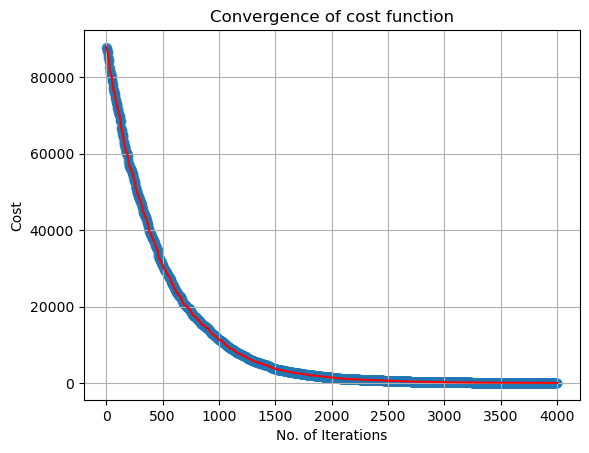

In [44]:
plt.scatter(range(len(cost_function_stoc)), cost_function_stoc, alpha = 0.3)
plt.plot(range(len(cost_function_stoc)), cost_function_stoc, color = 'red')
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of cost function")
plt.grid(True)
plt.show()

## Notes:
1. As expected, the cost function converges to the minimum well. However, the red plot formed in this cost function seems to be jagged.
2. This indicates higher noisiness in each step that leads to the analytical minimum.
3. However, this normally indicates faster convergence to the minimum.
4. In this case, the basic updation algorithm is: $$ \theta^{i + 1} = \theta^{i} - \beta \nabla_{\theta} X^{i^{T}} (H_{\theta}(X^{i}) - Y^{i}) $$
5. Since stochastic gradient descent works for the cost per sample as well, it mean that each sample cost is also a convex function in $\theta$

# Best of both:

In [45]:
Q_sb = np.zeros((31, 1))
#Initialised the Theta vector at origin, with all 0 entries.
#There is no need to define a gradient function here, since we use the previous ones for our operations.
#This time, we expect the updates to be even noisier, but much faster in comparison. The Cost function should settle well at the minimum.

In [46]:
learn_rate = 0.001
#Arbitrarily set the learning rate per batch.
batch_size = 50
#Arbitrarily set batch size up till 50.
cost_function_sb = []
#To store and record cost.
epochs = 2
#Same logic as before: 1 epoch = 1 full iteration through the dataset = 2000 iterations. 2 epochs = 4000 iterations.
k = 0
#This is our epoch iterator.
while(k < epochs):
    i = 0
    j = 0
    #Batch no. + Internal batch sample iterators set at 0.
    perm_index = np.random.permutation(X.shape[0])
    X = X[perm_index]
    Y = Y[perm_index]
    #Since we are going for a stochastic cum batch approach, shuffling the samples ensures lower variance in the long run for epoch iteration..
    while(i < X.shape[0] / batch_size):
        X_batch_i = X[i * batch_size : (i + 1) * batch_size]
        Y_batch_i = Y[i * batch_size : (i + 1) * batch_size]
        #Slicing X and Y matrix to create a batch.
        while(j < batch_size * (i + 1)):
            errors = X @ Q_sb - Y
            cost = np.mean(errors**2)
            cost_function_sb.append(cost)
            #Recording the cost function and appending it.
            Q_sb -= learn_rate*grad_b(X_batch_i, Y_batch_i, Q_sb)
            #Basic updation rule.
            j += 1
        i += 1
    k += 1

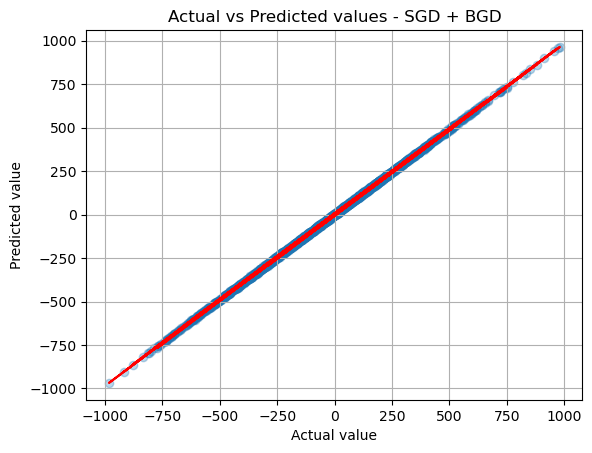

In [47]:
plt.scatter(Y, X @ Q_sb, alpha = 0.3)
plt.plot(Y, X @ Q_sb, color = 'red')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted values - SGD + BGD")
plt.grid(True)
plt.show()

## Notes:
1. As seen, the estimated line cleanly converges with the line X = Y. This shows that the predicted values are very close to actual values.
2. The red line denotes the linear estimated plot between predicted and actual values.
3. The blue scatterplot represents the predicted values for actual values. It is this scatterplot around which our line is centered.
4. A small difference here; the red coloured plot of the line is wider in comparison to either of the red plots in Pure Batch or Pure stochastic descents.
5. Indicates a stronger variance of values.

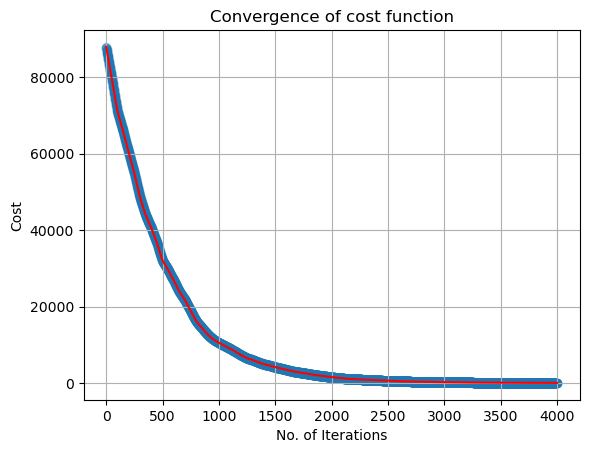

In [48]:
plt.scatter(range(len(cost_function_sb)), cost_function_sb, alpha = 0.3)
plt.plot(range(len(cost_function_sb)), cost_function_sb, color = 'red')
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of cost function")
plt.grid(True)
plt.show()

## Notes:
1. As expected, the cost function converges to the minimum well. However, the red plot seems to look rather wavy.
2. This is in contrast to Pure stochastic gradient descent, where the red plot had rather sharp spikes/a rougher look.
3. Again, this indicates a faster ability to converge at the cost of noisiness. However, the cost settles well at reaching the minimum.
4. This combines the stochastic and batch gradient descent methods well.